#TASK #1: UNDERSTAND THE PROBLEM STATEMENT & BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1U3eRNUYyza1A7EFopacJyujR87Vm_ae8)


![alt text](https://drive.google.com/uc?id=139zlnLGzYen-GbcnkXQZs44tf7OqV8e4)

#TASK #2: IMPORT DATASETS AND LIBRARIES


In [1]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras
import os 


In [4]:

# Read the stock data file
os.getcwd()
stocks_df_price = pd.read_csv('stock.csv')

In [5]:
# Read the stocks volume data
stocks_df_volume = pd.read_csv('stock_volume.csv')

In [6]:
# Sort the data based on Date
stocks_df_price = stocks_df_price.sort_values(by= ['Date'])
stocks_df_price

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [7]:
# Sort the volume data based on Date
stocks_df_volume = stocks_df_volume.sort_values(by= ['Date'])
stocks_df_volume

Date      AAPL        BA         T       MGM     AMZN      IBM  \
0     2012-01-12  53146800   3934500  26511100  17891100  5385800  6881000   
1     2012-01-13  56505400   4641100  22096800  16621800  4753500  5279200   
2     2012-01-17  60724300   3700100  23500200  15480800  5644500  6003400   
3     2012-01-18  69197800   4189500  22015000  18387600  7473500  4600600   
4     2012-01-19  65434600   5397300  25524000  14022900  7096000  8567200   
...          ...       ...       ...       ...       ...      ...      ...   
2154  2020-08-05  30498000  46551000  22991700  18914200  3930000  3675400   
2155  2020-08-06  50607200  32921600  21908700  35867700  3940600  3417100   
2156  2020-08-07  49453300  19301600  30398500  34530300  3929600  3651000   
2157  2020-08-10  53100900  35857700  35514400  71219700  3167300  3968300   
2158  2020-08-11  46871100  60966900  30978300  34357900  3706600  4998500   

         TSLA      GOOG       sp500  
0      729300   3764400  4019890000  
1     5500400   4631800  3692370000  
2     4651600   3832800  4010490000  
3     1260200   5544000  4096160000  
4     1246300  12657800  4465890000  
...       ...       ...         ...  
2154  4978000   1979500  4732220000  
2155  5992300   1995400  4267490000  
2156  8883500   1576600  4104860000  
2157  7522300   1289300  4318570000  
2158  8356000   1452000  5087650000  

[2159 rows x 10 columns]

In [8]:
# Check if Null values exist in stock prices data
stocks_df_price.isnull().any()

Date     False
AAPL     False
BA       False
T        False
MGM      False
AMZN     False
IBM      False
TSLA     False
GOOG     False
sp500    False
dtype: bool

In [9]:
# Check if Null values exist in stocks volume data
stocks_df_volume.isnull().any()

Date     False
AAPL     False
BA       False
T        False
MGM      False
AMZN     False
IBM      False
TSLA     False
GOOG     False
sp500    False
dtype: bool

In [10]:
# Get stock prices dataframe info
stocks_df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [11]:
# Get stock volume dataframe info
stocks_df_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


**MINI CHALLENGE #1:**
- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the S&P500 over the specified time period?**
- **What is the maximum price of Tesla Stock?**


In [12]:
stocks_df_price.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [13]:
stocks_df_volume.describe()

AAPL            BA             T           MGM          AMZN  \
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03   
mean   5.820332e+07  6.419916e+06  2.832131e+07  9.845582e+06  4.102673e+06   
std    4.568141e+07  9.711873e+06  1.428911e+07  7.295753e+06  2.290722e+06   
min    1.136200e+07  7.889000e+05  6.862400e+06  9.507000e+05  8.813000e+05   
25%    2.769930e+07  3.031850e+06  2.002150e+07  5.796450e+06  2.675700e+06   
50%    4.209420e+07  3.991000e+06  2.485930e+07  7.899800e+06  3.494800e+06   
75%    7.182480e+07  5.325900e+06  3.210565e+07  1.104055e+07  4.768150e+06   
max    3.765300e+08  1.032128e+08  1.950827e+08  9.009820e+07  2.385610e+07   

                IBM          TSLA          GOOG         sp500  
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  
mean   4.453090e+06  7.001302e+06  2.498238e+06  3.680732e+09  
std    2.462811e+06  5.781208e+06  1.928407e+06  8.622717e+08  
min    1.193000e+06  3.649000e+05  7.900000e+03  1.248960e+09  
25%    3.111250e+06  3.433450e+06  1.325400e+06  3.211890e+09  
50%    3.825000e+06  5.581100e+06  1.813900e+06  3.526890e+09  
75%    4.937300e+06  8.619550e+06  3.245350e+06  3.933290e+09  
max    3.049020e+07  6.093880e+07  2.497790e+07  9.044690e+09

In [14]:
# What is the average trading volume for Apple stock?**
stocks_df_volume['AAPL'].mean()


58203317.41547012

In [15]:
# - **What is the maximum trading volume for AMZN?**
stocks_df_volume['AMZN'].max()

23856100

In [16]:
# - **Which security is traded the most? comment on your answer**
stocks_df_volume.max()

# AAPL is the most traded single security, however, the s&p500 is of course the most traded being the index

Date     2020-08-11
AAPL      376530000
BA        103212800
T         195082700
MGM        90098200
AMZN       23856100
IBM        30490200
TSLA       60938800
GOOG       24977900
sp500    9044690000
dtype: object

In [17]:
# - **What is the average stock price of the S&P500 over the specified time period?**
stocks_df_price['AMZN'].mean()

915.6656649203334

In [18]:
# - **What is the maximum price of Tesla Stock?**
stocks_df_price['TSLA'].max()

1643.0

#TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [19]:
# Function to normalize stock prices based on their initial price
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        # normalize calculation = base value for each cell = base cell / base cell row index 0
        x[i] = x[i] / x[i][0]
    return x

In [20]:
# Function to plot interactive plots using Plotly Express

def interactive_plot(df,title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y= df[i], name = i)
    fig.show()

In [21]:
# plot interactive chart for stocks data

interactive_plot(stocks_df_price, "Stocks Data")


**MINI CHALLENGE #2:**
- **Plot the volume dataset for all stocks, list any observations you might see.**
- **Plot the normalized stock prices and volume dataset.**

In [22]:
interactive_plot(stocks_df_volume, "Volume Stock Data")

In [23]:
interactive_plot(normalize(stocks_df_price),"Normalized Stock Price Data")

In [24]:
interactive_plot(normalize(stocks_df_volume),"Normalized Volume Stock Data")

# TASK #4: PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

![alt text](https://drive.google.com/uc?id=1uXYYHfgeJyncu4BZRAooTC4iCclH9e9B)

In [25]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date':price_df['Date'], 'Close':price_df[name], 'Volume':vol_df[name]       })

In [26]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 

def tradingwindow(data):
    # set the trading window (e.g. 1 day)
    n = 1 
    data['Target'] = data[['Close']].shift(-n)
    return data

In [27]:
# Let's test the functions and get individual stock prices and volumes for AAPL

price_volume_df = individual_stock(stocks_df_price, stocks_df_volume, 'AAPL')


In [28]:
price_volume_target_df = tradingwindow(price_volume_df)
# Target represents the following day which is our 1 day trading window target
price_volume_target_df

Date       Close    Volume      Target
0     2012-01-12   60.198570  53146800   59.972858
1     2012-01-13   59.972858  56505400   60.671429
2     2012-01-17   60.671429  60724300   61.301430
3     2012-01-18   61.301430  69197800   61.107143
4     2012-01-19   61.107143  65434600   60.042858
...          ...         ...       ...         ...
2154  2020-08-05  440.250000  30498000  455.609985
2155  2020-08-06  455.609985  50607200  444.450012
2156  2020-08-07  444.450012  49453300  450.910004
2157  2020-08-10  450.910004  53100900  437.500000
2158  2020-08-11  437.500000  46871100         NaN

[2159 rows x 4 columns]

In [29]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df


Date       Close    Volume      Target
0     2012-01-12   60.198570  53146800   59.972858
1     2012-01-13   59.972858  56505400   60.671429
2     2012-01-17   60.671429  60724300   61.301430
3     2012-01-18   61.301430  69197800   61.107143
4     2012-01-19   61.107143  65434600   60.042858
...          ...         ...       ...         ...
2153  2020-08-04  438.660004  43267900  440.250000
2154  2020-08-05  440.250000  30498000  455.609985
2155  2020-08-06  455.609985  50607200  444.450012
2156  2020-08-07  444.450012  49453300  450.910004
2157  2020-08-10  450.910004  53100900  437.500000

[2158 rows x 4 columns]

In [30]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1),)
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns=['Date']))


In [31]:
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [32]:
price_volume_target_scaled_df.shape

(2158, 3)

In [33]:
# Create Feature and Target
# using [row, column] indexing to get the price column
X = price_volume_target_scaled_df[:,:2]
# 2: will get the target column as it's the only column after 2:
y = price_volume_target_scaled_df[:, 2:]

In [34]:
X

array([[0.01102638, 0.11442624],
       [0.01046185, 0.12362365],
       [0.01220906, 0.13517696],
       ...,
       [1.        , 0.10747163],
       [0.97208751, 0.10431171],
       [0.98824476, 0.11430054]])

In [35]:
y

array([[0.01046185],
       [0.01220906],
       [0.01378478],
       ...,
       [0.97208751],
       [0.98824476],
       [0.95470465]])

In [36]:

X.shape,y.shape

((2158, 2), (2158, 1))

In [37]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data


In [38]:
# Select 65% of the data for train vs test split
split = int(0.65 * len(X))


In [39]:
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]


In [40]:
X_train.shape, y_train.shape

((1402, 2), (1402, 1))

In [41]:
X_test.shape, y_test.shape

((756, 2), (756, 1))

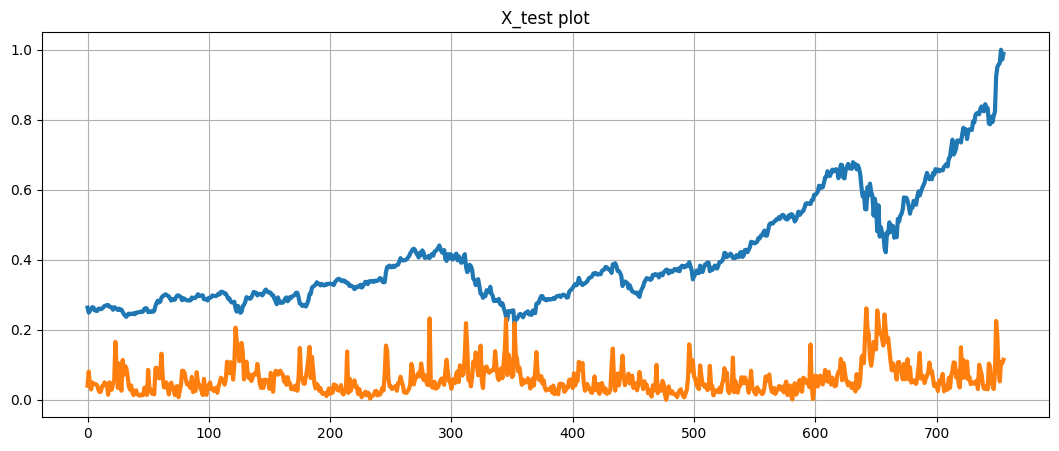

In [42]:
# Define a data plotting function
def show_plot(data, title):
    plt.figure(figsize=(13,5))
    plt.plot(data, linewidth =3)
    plt.title(title)
    plt.grid()


show_plot(X_train, 'X_train plot')
show_plot(X_test, 'X_test plot')



**MINI CHALLENGE #3:**
- **Test the created pipeline with S&P500 and AMZN datasets**

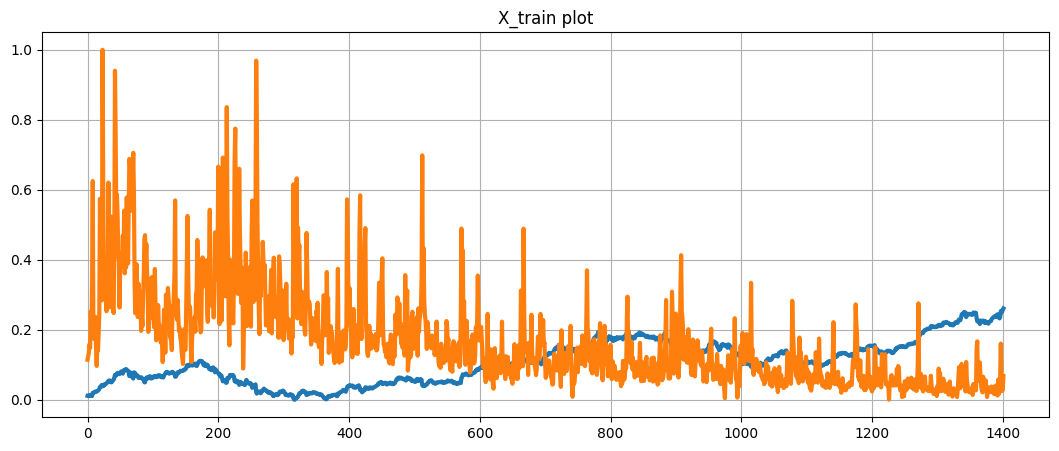

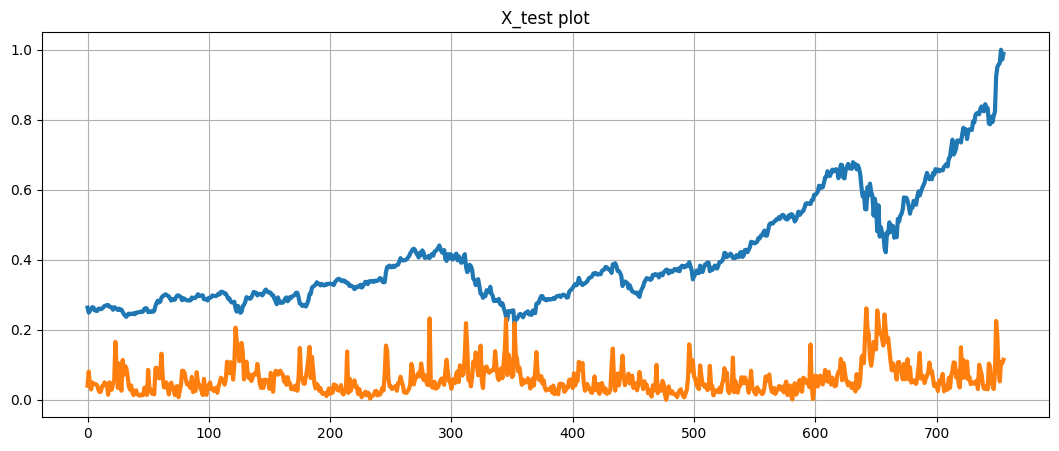

In [43]:
#AMZN

# get price and volume of stock
price_volume_df_amazon = individual_stock(stocks_df_price, stocks_df_volume, 'AMZN')
price_volume_df_amazon

# set target for model to predict
tradingwindow(price_volume_df_amazon)

# drop last row 
price_volume_df_amazon_target = price_volume_df_amazon[:-1]

# scale the data
price_volume_df_amazon_scaled = sc.fit_transform(price_volume_df_amazon_target.drop(columns='Date'))
price_volume_df_amazon_scaled.shape

# split the data 
split = int(.65 * len(X))
Xamzn = price_volume_df_amazon_scaled[:,:2] 
yamzn = price_volume_df_amazon_scaled[:,2:] 

# train and test data

X_trainamzn = X[:split]
y_trainamzn = y[:split]

X_testamzn = X[split:]
y_testamzn = y[split:]

# plot data
show_plot(X_trainamzn, "X_train plot")
show_plot(X_testamzn, "X_test plot")


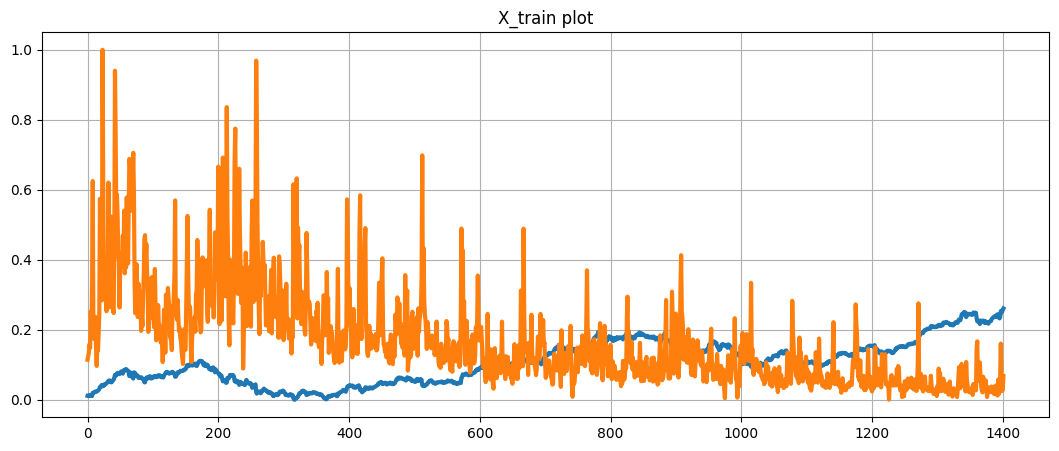

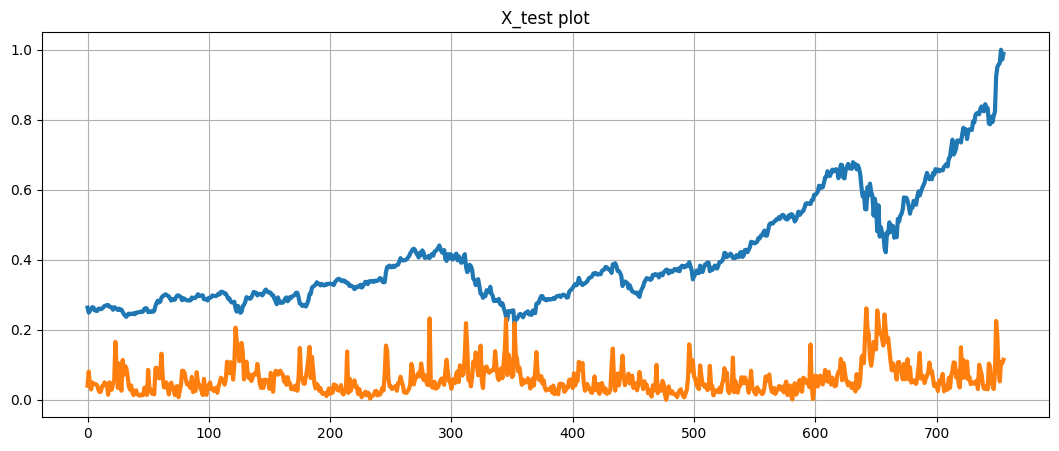

In [44]:
#sp500

# get price and volume of stock
price_volume_df_sp500 = individual_stock(stocks_df_price, stocks_df_volume, 'sp500')
price_volume_df_sp500

# set target for model to predict
tradingwindow(price_volume_df_sp500)

# drop last row 
price_volume_df_sp500_target = price_volume_df_sp500[:-1]

# scale the data
price_volume_df_sp500_scaled = sc.fit_transform(price_volume_df_sp500_target.drop(columns='Date'))
price_volume_df_sp500_scaled.shape

# split the data 
split = int(.65 * len(X))
Xsp = price_volume_df_sp500_scaled[:,:2] 
ysp = price_volume_df_sp500_scaled[:,2:] 

# train and test data

X_trainsp = X[:split]
y_trainsp = y[:split]

X_testsp = X[split:]
y_testsp = y[split:]

# plot data using show plot function
show_plot(X_trainsp, "X_train plot")
show_plot(X_testsp, "X_test plot")


# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND REGRESSION 

![alt text](https://drive.google.com/uc?id=1wJHaXRzsqMi713Qkzo2IQgZTmsDxU8f7)

![alt text](https://drive.google.com/uc?id=1vDuV9M1b6KF5yIvWpiUqhI7zSr7CKk5g)

![alt text](https://drive.google.com/uc?id=1H-wED3vnYj3ZpsvK0dOEPwYGVjSVhpfI)

Linear regression model: 
Y = mX+ b 

dependant variable = slope of X indepedant variable + b (intercept of Y)

![alt text](https://drive.google.com/uc?id=1KM0yvHp1DjVZ87uf68yJdqj2Sh_oTLLT)

# TASK #6: UNDERSTAND THE CONCEPT OF REGULARIZATION & RIDGE REGRESSION

In [45]:
# theory

![alt text](https://drive.google.com/uc?id=1m9NX1aEDLAW2QCqeiQMYggnY3ovVW8QO)

In [46]:
# Ridge regression will slightly changeing the slope of the line by reducing the biases 
# to increase variance to better function for the test data

![alt text](https://drive.google.com/uc?id=13Wn7UkxVkbRlIiJ-rZIrqAItfumj_wzi)

![alt text](https://drive.google.com/uc?id=1WB1wdMUYqDNAhCytmk889w9SVQQVrwlt)

![alt text](https://drive.google.com/uc?id=1IsQLtMZbKMyITX_FVr50ZkB68uUuQwmB)

![alt text](https://drive.google.com/uc?id=1D37GCrEMLdFwjTQL9WIoPEsLlEyITuX5)

![alt text](https://drive.google.com/uc?id=1IBz73HFZPUD6wTEoerXGFTJKhhZyAyb9)

# TASK #7: BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

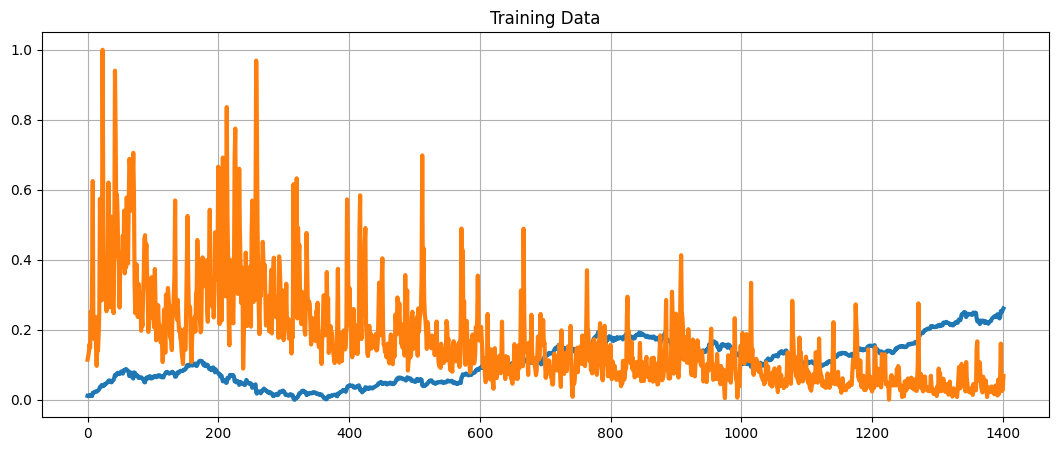

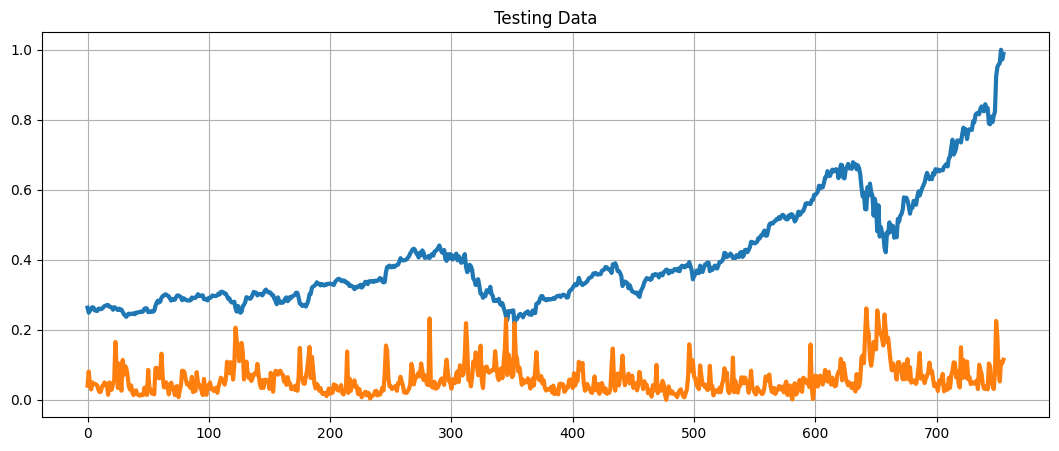

In [47]:
# Creating Feature and Target
X = price_volume_target_scaled_df [:,:2]
y = price_volume_target_scaled_df [:,2:]
split = int(0.65 * len(X))
X_train1 = X[:split]
y_train1 = y[:split]
X_test1 = X[split:]
y_test1 = y[split:]

X_train.shape, y_train.shape
X_test.shape, y_test.shape

def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train1, 'Training Data')
show_plot(X_test1, 'Testing Data')

In [48]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [49]:
# Test the model and calculate its accuracy 2
lr_accuracy = regression_model.score(X_test, y_test)
print('My ridge regression score accuracy for test data was {}'.format(lr_accuracy))

My ridge regression score accuracy for test data was 0.7950028030821767


In [50]:
# Make Prediction on 
predicted_prices = regression_model.predict(X)
predicted_prices


array([[0.03466412],
       [0.03374627],
       [0.03451936],
       ...,
       [0.81048342],
       [0.78876033],
       [0.80091324]])

In [51]:
# Append the predicted values into a list
Predicted = []

for i in predicted_prices:
    Predicted.append(i[0])
  

In [52]:
len(Predicted)

2158

In [53]:
price_volume_df_sp500_scaled 

array([[0.00828228, 0.35544202, 0.00524163],
       [0.00524163, 0.31342927, 0.00741423],
       [0.00741423, 0.35423623, 0.01423076],
       ...,
       [0.98245348, 0.38720299, 0.98345918],
       [0.98345918, 0.36634157, 0.9878185 ],
       [0.9878185 , 0.3937553 , 0.97511517]])

In [54]:
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [55]:
# Append the close values to the list
close = []

for i in price_volume_target_scaled_df:
    close.append(i[0])


In [56]:
# Create a dataframe based on the dates in the individual stock data

df_predicted = price_volume_target_df[['Date']]
df_predicted

Date
0     2012-01-12
1     2012-01-13
2     2012-01-17
3     2012-01-18
4     2012-01-19
...          ...
2153  2020-08-04
2154  2020-08-05
2155  2020-08-06
2156  2020-08-07
2157  2020-08-10

[2158 rows x 1 columns]

In [57]:
# Add the close values to the dataframe

df_predicted['Close'] = close
df_predicted


Date     Close
0     2012-01-12  0.011026
1     2012-01-13  0.010462
2     2012-01-17  0.012209
3     2012-01-18  0.013785
4     2012-01-19  0.013299
...          ...       ...
2153  2020-08-04  0.957606
2154  2020-08-05  0.961583
2155  2020-08-06  1.000000
2156  2020-08-07  0.972088
2157  2020-08-10  0.988245

[2158 rows x 2 columns]

In [58]:
# Add the predicted values to the dataframe

df_predicted['Predicted'] = Predicted
df_predicted

Date     Close  Predicted
0     2012-01-12  0.011026   0.034664
1     2012-01-13  0.010462   0.033746
2     2012-01-17  0.012209   0.034519
3     2012-01-18  0.013785   0.034556
4     2012-01-19  0.013299   0.034707
...          ...       ...        ...
2153  2020-08-04  0.957606   0.778280
2154  2020-08-05  0.961583   0.783205
2155  2020-08-06  1.000000   0.810483
2156  2020-08-07  0.972088   0.788760
2157  2020-08-10  0.988245   0.800913

[2158 rows x 3 columns]

In [59]:
# Plot the results
interactive_plot(df_predicted, 'Original vs Predictions') # review prediction result

**MINI CHALLENGE #4:**
- **Experiment with various regularization values for alpha** 
- **What is the impact of increasing alpha?**
- **Note: default value for alpha is = 1**


In [60]:
# predictive accuracy decreases with an increase in alpha= 
# this is as a result of the fact we are raising the value of the penalty term alpha which reduces bias and increases variances

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1U2auh7KSalF4qc8iWFScawEB3TniFeXw)

![alt text](https://drive.google.com/uc?id=1xsy74Dj9JyuvwcPzmQcwN9hzHGevAvKB)

![alt text](https://drive.google.com/uc?id=1b2wIRl63jXgyoh_w1ysxk3XvTJ5j8864)

In [61]:
# multi-layer non-linear sigmoid activation 
# developing a large matrix multiplication

# TASK #9: UNDERSTAND HOW DO ARTFICIAL NEURAL NETWORKS TRAIN 

![alt text](https://drive.google.com/uc?id=1pg1rxBoHDtRNVNN0TyMvnCMVKw9ni5pN)

![alt text](https://drive.google.com/uc?id=1wc4NOBLC55Hb2s8s_hLI2LWykV4WmLwU)

![alt text](https://drive.google.com/uc?id=1zI3MbDUAws-gpPisqDrVL8BoupWRO6KJ)

we are using gradient descent algorithm to optimise the error rate using $ \hat{y}_{i} - y_{i}$

![alt text](https://drive.google.com/uc?id=1twCXUdFtdFMGsicoQOWI0a9RiHMZ9MK_)

# TASK #10: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1a6w38XX_W2Zcsvde5FDepUax1aRyvnBT)

In [62]:
# Recurrent neural networks in addition to taking an input, also evaluate the input at each layer and leverage the output as an additional parameter

![alt text](https://drive.google.com/uc?id=1tc1SRSaFp-zuvujAQY66E_JEoY6doI0m)

![alt text](https://drive.google.com/uc?id=10xmgZjv2IjaY4xFm81rwgKqOC0119tug)

![alt text](https://drive.google.com/uc?id=1CwBOagYD82QaayeGDndRjb_Irm5HIwBs)

![alt text](https://drive.google.com/uc?id=148mslyqerZ_gLzQIkPFiDsewCO5nMNK7)

![alt text](https://drive.google.com/uc?id=1_Ky5ek9gq_Ov6VLTkXFmmzEhvjo91tpB)

# TASK #11: UNDERSTAND THE THEORY AND INTUITION BEHIND LONG SHORT TERM MEMORY NETWORKS

![alt text](https://drive.google.com/uc?id=1cd3jZpTuSzsPjMps6SRFqvXNfs4jA_vu)

![alt text](https://drive.google.com/uc?id=1URS5Ny54g-c3ookAL1FLn28TYFlbDIdG)

![alt text](https://drive.google.com/uc?id=1Cm3Unnn_b71rfklW_ejm50xYOYkXh8cl)

In [63]:
# LSTM neural networks overcome vanishing gradient issues by recalling older information from the origina layers to integrate into future layers. 

![alt text](https://drive.google.com/uc?id=1pU8lbF965n38ZspjIFsEAU3CEjpclpfd)

![alt text](https://drive.google.com/uc?id=1zSqTnPZDfiz6qRgMHaFB9wpB55Fnzwf4)

# TASK #12: TRAIN AN LSTM TIME SERIES MODEL

In [64]:
# Let's test the functions and get individual stock prices and volumes for sp500
price_volume_df = individual_stock(stocks_df_price, stocks_df_volume, 'sp500')
price_volume_df

Date        Close      Volume
0     2012-01-12  1295.500000  4019890000
1     2012-01-13  1289.089966  3692370000
2     2012-01-17  1293.670044  4010490000
3     2012-01-18  1308.040039  4096160000
4     2012-01-19  1314.500000  4465890000
...          ...          ...         ...
2154  2020-08-05  3327.770020  4732220000
2155  2020-08-06  3349.159912  4267490000
2156  2020-08-07  3351.280029  4104860000
2157  2020-08-10  3360.469971  4318570000
2158  2020-08-11  3333.689941  5087650000

[2159 rows x 3 columns]

In [65]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:,1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [66]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_data_scaled = sc.fit_transform(training_data)


In [67]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_data_scaled[i-1:i,0])
    y.append(training_data_scaled[i,0])

In [68]:
X

[array([0.00828228]),
 array([0.00524163]),
 array([0.00741423]),
 array([0.01423076]),
 array([0.0172951]),
 array([0.01771253]),
 array([0.01800663]),
 array([0.01736626]),
 array([0.02277871]),
 array([0.01915935]),
 array([0.01816315]),
 array([0.01658831]),
 array([0.0163037]),
 array([0.02184418]),
 array([0.02253203]),
 array([0.03171561]),
 array([0.03144519]),
 array([0.03273549]),
 array([0.03411583]),
 array([0.0350598]),
 array([0.03064355]),
 array([0.03497445]),
 array([0.034372]),
 array([0.03092341]),
 array([0.03794869]),
 array([0.03946186]),
 array([0.03992672]),
 array([0.03776843]),
 array([0.04051967]),
 array([0.04160122]),
 array([0.04247878]),
 array([0.04465612]),
 array([0.04157279]),
 array([0.04556211]),
 array([0.04344649]),
 array([0.04093236]),
 array([0.03098508]),
 array([0.03538239]),
 array([0.04168189]),
 array([0.04403469]),
 array([0.04413903]),
 array([0.05593158]),
 array([0.05513944]),
 array([0.05908607]),
 array([0.05983085]),
 array([0.06247

In [69]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [70]:
y

array([0.00524163, 0.00741423, 0.01423076, ..., 0.98345918, 0.9878185 ,
       0.97511517])

In [71]:
# Split the data

# split the data to around 70% for training data
split = int(0.7 * len(X))

# split the variables X and y by the split ratio

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]




In [72]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [73]:
X_train[2]

array([[0.00741423]])

In [74]:
# Create the model using keras
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [75]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
38/38 [==============================] - 8s 42ms/step - loss: 0.0325 - val_loss: 0.0679
Epoch 2/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 3/20
38/38 [==============================] - 0s 12ms/step - loss: 8.4480e-04 - val_loss: 8.8570e-04
Epoch 4/20
38/38 [==============================] - 0s 12ms/step - loss: 4.2585e-04 - val_loss: 1.3896e-04
Epoch 5/20
38/38 [==============================] - 0s 12ms/step - loss: 3.3924e-04 - val_loss: 2.3124e-04
Epoch 6/20
38/38 [==============================] - 0s 12ms/step - loss: 3.3068e-04 - val_loss: 3.8060e-04
Epoch 7/20
38/38 [==============================] - 0s 12ms/step - loss: 3.3847e-04 - val_loss: 2.2864e-04
Epoch 8/20
38/38 [==============================] - 0s 12ms/step - loss: 3.0498e-04 - val_loss: 3.7187e-05
Epoch 9/20
38/38 [==============================] - 0s 12ms/step - loss: 2.8036e-04 - val_loss: 5.9381e-05
Epoch 10/20
38/38 [==============================] - 

In [76]:
# Make prediction
predicted = model.predict(X)

68/68 [==============================] - 2s 5ms/step


In [77]:
test_predicted = [] 

for i in predicted:
    test_predicted.append(i[0])


In [78]:
test_predicted

[0.008233976,
 0.005172802,
 0.0073600654,
 0.014222373,
 0.017307151,
 0.017727371,
 0.01802343,
 0.017378796,
 0.022827117,
 0.019183807,
 0.018180981,
 0.016595658,
 0.016309153,
 0.021886416,
 0.022578813,
 0.031822514,
 0.031550333,
 0.032849003,
 0.034238268,
 0.035188314,
 0.03074348,
 0.03510241,
 0.03449609,
 0.031025164,
 0.038095746,
 0.03961858,
 0.040086407,
 0.037914336,
 0.040683128,
 0.041771546,
 0.042654652,
 0.04484573,
 0.041742936,
 0.045757405,
 0.043628477,
 0.041098434,
 0.031087233,
 0.035512984,
 0.04185272,
 0.044220384,
 0.04432538,
 0.056190938,
 0.055393964,
 0.059364498,
 0.060113743,
 0.06277645,
 0.06075795,
 0.059502907,
 0.054678082,
 0.05674454,
 0.06600204,
 0.06409821,
 0.0607675,
 0.059689023,
 0.062165633,
 0.067209214,
 0.06450856,
 0.05762741,
 0.05720745,
 0.049628437,
 0.03835827,
 0.043189287,
 0.05219149,
 0.04392921,
 0.043599803,
 0.053723566,
 0.051031724,
 0.04710828,
 0.04787676,
 0.042344358,
 0.044745445,
 0.053680576,
 0.058114193,


In [79]:
test_predicted

[0.008233976,
 0.005172802,
 0.0073600654,
 0.014222373,
 0.017307151,
 0.017727371,
 0.01802343,
 0.017378796,
 0.022827117,
 0.019183807,
 0.018180981,
 0.016595658,
 0.016309153,
 0.021886416,
 0.022578813,
 0.031822514,
 0.031550333,
 0.032849003,
 0.034238268,
 0.035188314,
 0.03074348,
 0.03510241,
 0.03449609,
 0.031025164,
 0.038095746,
 0.03961858,
 0.040086407,
 0.037914336,
 0.040683128,
 0.041771546,
 0.042654652,
 0.04484573,
 0.041742936,
 0.045757405,
 0.043628477,
 0.041098434,
 0.031087233,
 0.035512984,
 0.04185272,
 0.044220384,
 0.04432538,
 0.056190938,
 0.055393964,
 0.059364498,
 0.060113743,
 0.06277645,
 0.06075795,
 0.059502907,
 0.054678082,
 0.05674454,
 0.06600204,
 0.06409821,
 0.0607675,
 0.059689023,
 0.062165633,
 0.067209214,
 0.06450856,
 0.05762741,
 0.05720745,
 0.049628437,
 0.03835827,
 0.043189287,
 0.05219149,
 0.04392921,
 0.043599803,
 0.053723566,
 0.051031724,
 0.04710828,
 0.04787676,
 0.042344358,
 0.044745445,
 0.053680576,
 0.058114193,


In [80]:
df_predicted = price_volume_df[1:][['Date','Close']]
df_predicted

Date        Close
1     2012-01-13  1289.089966
2     2012-01-17  1293.670044
3     2012-01-18  1308.040039
4     2012-01-19  1314.500000
5     2012-01-20  1315.380005
...          ...          ...
2154  2020-08-05  3327.770020
2155  2020-08-06  3349.159912
2156  2020-08-07  3351.280029
2157  2020-08-10  3360.469971
2158  2020-08-11  3333.689941

[2158 rows x 2 columns]

In [81]:
df_predicted['predictionssp'] = test_predicted

In [82]:
df_predicted

Date        Close  predictionssp
1     2012-01-13  1289.089966       0.008234
2     2012-01-17  1293.670044       0.005173
3     2012-01-18  1308.040039       0.007360
4     2012-01-19  1314.500000       0.014222
5     2012-01-20  1315.380005       0.017307
...          ...          ...            ...
2154  2020-08-05  3327.770020       0.926664
2155  2020-08-06  3349.159912       0.935530
2156  2020-08-07  3351.280029       0.944424
2157  2020-08-10  3360.469971       0.945304
2158  2020-08-11  3333.689941       0.949116

[2158 rows x 3 columns]

In [83]:
test_predicted = []

for i in predicted:
    test_predicted.append(i[0])

In [84]:
test_predicted

[0.008233976,
 0.005172802,
 0.0073600654,
 0.014222373,
 0.017307151,
 0.017727371,
 0.01802343,
 0.017378796,
 0.022827117,
 0.019183807,
 0.018180981,
 0.016595658,
 0.016309153,
 0.021886416,
 0.022578813,
 0.031822514,
 0.031550333,
 0.032849003,
 0.034238268,
 0.035188314,
 0.03074348,
 0.03510241,
 0.03449609,
 0.031025164,
 0.038095746,
 0.03961858,
 0.040086407,
 0.037914336,
 0.040683128,
 0.041771546,
 0.042654652,
 0.04484573,
 0.041742936,
 0.045757405,
 0.043628477,
 0.041098434,
 0.031087233,
 0.035512984,
 0.04185272,
 0.044220384,
 0.04432538,
 0.056190938,
 0.055393964,
 0.059364498,
 0.060113743,
 0.06277645,
 0.06075795,
 0.059502907,
 0.054678082,
 0.05674454,
 0.06600204,
 0.06409821,
 0.0607675,
 0.059689023,
 0.062165633,
 0.067209214,
 0.06450856,
 0.05762741,
 0.05720745,
 0.049628437,
 0.03835827,
 0.043189287,
 0.05219149,
 0.04392921,
 0.043599803,
 0.053723566,
 0.051031724,
 0.04710828,
 0.04787676,
 0.042344358,
 0.044745445,
 0.053680576,
 0.058114193,


In [85]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

Date
1     2012-01-13
2     2012-01-17
3     2012-01-18
4     2012-01-19
5     2012-01-20
...          ...
2154  2020-08-05
2155  2020-08-06
2156  2020-08-07
2157  2020-08-10
2158  2020-08-11

[2158 rows x 1 columns]

In [86]:
df_predicted['predictions'] = test_predicted

In [87]:
df_predicted

Date  predictions
1     2012-01-13     0.008234
2     2012-01-17     0.005173
3     2012-01-18     0.007360
4     2012-01-19     0.014222
5     2012-01-20     0.017307
...          ...          ...
2154  2020-08-05     0.926664
2155  2020-08-06     0.935530
2156  2020-08-07     0.944424
2157  2020-08-10     0.945304
2158  2020-08-11     0.949116

[2158 rows x 2 columns]

In [88]:
close = []

for i in training_data_scaled:
    close.append(i[0])

In [89]:
close

[0.008282282297732424,
 0.0052416276750753,
 0.00741422696906191,
 0.0142307573843935,
 0.01729509530784823,
 0.017712533229583327,
 0.018006633177067966,
 0.017366260479376172,
 0.02277870847379071,
 0.019159350140567022,
 0.018163150636518743,
 0.01658830576800918,
 0.016303702004927256,
 0.02184417795686766,
 0.02253203252528968,
 0.031715607508639554,
 0.03144519086195274,
 0.03273549031348555,
 0.03411583203621682,
 0.03505980086579574,
 0.030643552849788036,
 0.03497444905223135,
 0.03437200416912045,
 0.030923407809130832,
 0.037948686358382555,
 0.039461862239767,
 0.039926724634844146,
 0.037768427726387443,
 0.04051967285919389,
 0.04160122417680656,
 0.04247877616423823,
 0.04465612378760542,
 0.04157279302098682,
 0.04556210693085683,
 0.0434464861663616,
 0.04093236245154841,
 0.030985076796256172,
 0.03538239031520529,
 0.04168188600709555,
 0.04403468606133076,
 0.044139031192417466,
 0.05593157836290619,
 0.05513943653514419,
 0.05908607477541117,
 0.05983085000157784,


In [90]:
df_predicted['Close'] = close[1:]

In [91]:
df_predicted

Date  predictions     Close
1     2012-01-13     0.008234  0.005242
2     2012-01-17     0.005173  0.007414
3     2012-01-18     0.007360  0.014231
4     2012-01-19     0.014222  0.017295
5     2012-01-20     0.017307  0.017713
...          ...          ...       ...
2154  2020-08-05     0.926664  0.972307
2155  2020-08-06     0.935530  0.982453
2156  2020-08-07     0.944424  0.983459
2157  2020-08-10     0.945304  0.987819
2158  2020-08-11     0.949116  0.975115

[2158 rows x 3 columns]

In [92]:
interactive_plot(df_predicted, 'Original prices vs LSTM prediction')

**MINI CHALLENGE #5:**
- **Test the pipeline with at least 3 other stocks** 
- **Experiment with various LSTM model parameters (Ex: Use 150 units instead of 50), print out the model summary and retrain the model**


In [93]:
# Let's test the functions and get individual stock prices and volumes for sp500
price_volume_df = individual_stock(stocks_df_price, stocks_df_volume, 'AAPL')
price_volume_df

Date       Close    Volume
0     2012-01-12   60.198570  53146800
1     2012-01-13   59.972858  56505400
2     2012-01-17   60.671429  60724300
3     2012-01-18   61.301430  69197800
4     2012-01-19   61.107143  65434600
...          ...         ...       ...
2154  2020-08-05  440.250000  30498000
2155  2020-08-06  455.609985  50607200
2156  2020-08-07  444.450012  49453300
2157  2020-08-10  450.910004  53100900
2158  2020-08-11  437.500000  46871100

[2159 rows x 3 columns]

# **EXCELLENT JOB! YOU SHOULD BE TRULY PROUD WITH THE NEWLY ACQUIRED SKILLS**

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**
- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the S&P500 over the specified time period?**
- **What is the maximum price of Tesla Stock?**

In [89]:
# Get the statistical data for the stocks volume dataframe
# Average trading volume for Apple stock is 2.498238e+06	
# Average trading volume for S&P500 is 3.680732e+09

# Why S&P500 is the most traded of all? Check out this article: 
# https://www.investopedia.com/articles/personal-finance/022216/put-10000-sp-500-etf-and-wait-20-years.asp

# Text from the article above:
# "The S&P 500 index is a broad-based measure of large corporations traded on U.S. stock markets. Over long periods of time, 
# passively holding the index often produces better results than actively trading or picking single stocks.
# Over long-time horizons, the index typically produces better returns than actively managed portfolios."

stock_vol_df.describe()

NameError: name 'stock_vol_df' is not defined

In [ ]:
# Get the statistical data for the prices dataframe
stock_price_df.describe()

In [ ]:
# Average price for S&P500 = 2218.749554
# Maximum Tesla Price = 1643.000000

**MINI CHALLENGE #2 SOLUTION:**
- **Plot the normalized stock prices and volume dataset.**

In [ ]:
# Plot interactive chart for volume data
# Notice that S&P500 trading is orders of magnitude compared to individual stocks
interactive_plot(stock_vol_df, 'Stocks Volume')

In [ ]:
# plot interactive chart for normalized stocks prices data
interactive_plot(normalize(stock_price_df), 'Stock Prices')

# Let's normalize the data and re-plot interactive chart for volume data
interactive_plot(normalize(stock_vol_df), 'Normalized Volume')

**MINI CHALLENGE #3 SOLUTION:**
- **Test the pipeline with S&P500 and AMZN datasets instead of AAPL**

In [ ]:
# Let's test the functions and get individual stock prices and volumes for S&P500
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

# Let's test the functions and get individual stock prices and volumes for Amazon 
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AMZN')
price_volume_df

**MINI CHALLENGE #4 SOLUTION:**
- **Experiment with various regularization value for alpha** 
- **What is the impact of increasing alpha?**
- **Note: default value for alpha is = 1**

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization. 
# Create and train the Ridge Linear Regression Model
regression_model = Ridge(alpha = 2)
regression_model.fit(X_train, y_train)

**MINI CHALLENGE #5 SOLUTION:**
- **Test the pipeline with at least 3 other stocks** 
- **Experiment with various LSTM model parameters (Ex: Use 150 units instead of 50), print out the model summary and retrain the model**



In [ ]:
# Create the model layers with keras module
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()